# Time-Series Analysis & Forecasting

### DataScience Lifecycle 4D framework:

#### Define
- Examine UK National Grid dataset and perform Time-Series Analysis and perform forcasting.

#### Discover
- Dataset Downloaded from: http://www.gridwatch.templar.co.uk/download.php
- Data consider from 1st June, 2011 to 24th September, 2020
- Dataset consist following features:

    - **ID:** Unique Row identifier
    
    - **TimeStamp:** Date from 1/06/2011 to 24/09/2020 (includes daily data with 5 mins of equal interval of time).
    
    - **Demand:** Sum of Demand recorded by Central Montioring Meters for 5 mins of interval. Actual demand is may higher as those met by embeded technology like small wind turbines and domestic solar panels. (solar power not included)
    
    - **Frequency:** Grid Frequency, measure instantaneous imbalance between supply and demand. Balanced Threshold frequency in UK for grid is 50 Hz.
    
    - **Coal:** Output from the last remaining British Coal Fired power stations.
    
    - **Nuclear:** Output of all Britian's Nuclear Power stations.
    
    - **CCGT:** Total output of all Britian's Combined Cycle Gas Turbine power stations.
    
    - **Wind:** Output of all Metered Wind Farms (Unmetered not included) and Included only if demand more or less in proportion to the metered wind farms output.
    
    - **Pumped:** Output from National Grid pumped storage hydroelectric power stations. Power to use to Recharge batteries is not recorded as they included only if demand increase.
    
    - **Hydro:** Total output of all National Grids hydroelectric power stations.
    
    - **Biomass:** Reflects the larger wood burining power stations, such as Drax's converted coal boiler.
    
    - **Oil:** Almost never used except in some instance in past. Currently not clear any operational plant still exists.
    
    - **Solar:** Estimated output of solar power provided by Sheffield University. Included as per best Guess values not actual measured output (expected 10% larger than reality).
    
    - **OCGT:** Records of Britain's Open Cycle Gas Turbine Plants. These are operated only at peak demands, because they're 'Gas Guzzlers'. Build as Short Term Operating Reserve Plant, plant is paid to be available at short notice (Usally used to cover winter demands).
    
    - **FrenchICT:** +ve if import or -ve if export of power via French Interconnector.
    
    - **DutchICT:** +ve if import or -ve if export of power via Dutch Interconnector (BRITNED).
    
    - **IrishICT:** +ve if import or -ve if export of power via Irish Interconnector from Scotland (Moyle).
    
    - **EWICT:** +ve if import or -ve if export of power via Irish Interconnector from Wales(East-West).
    
    - **NEMOICT:** +ve if import or -ve if export of power via NEMO Interconnector from Kent to Belgium.
    
    - **Other:** Field used to represent biomass, but now has its own field. Not clear about field currently represents: possibly some STORAGE capacity like diesels.
    
    - **North-South:** Measure of power flow recorded by the National Grid from the North of England to the South.
    
    - **Scotland-England:** Measure of power flow recorded by the National Grid from the Scotland to England. It is particular interest to those looking to assess the impact of the closure of Scotland's Nuclear and Coal plant on the economy as they putatively independent 'all renewable' Scoland.
    
    
#### Develop
#### Deploy

In [168]:
pip install plotly

     |████████████████████████████████| 13.0 MB 1.3 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=cb77659f371ffa88c29304d3890a2795593fad83ffc0a6aeede93d168ef1d2ec
  Stored in directory: /Users/ganesh_dhasade/Library/Caches/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [571]:
# import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
import tensorflow as tf
import plotly.express as px
import plotly.graph_objects as go

rcParams['figure.figsize'] = 20,15
print("Tensorflow version ",tf.__version__)

Tensorflow version  2.3.1


In [312]:
DataSet = pd.read_csv("/Users/ganesh_dhasade/Documents/GitHub/BIG_DataNationalGird/NationalGridUK.csv")

In [313]:
DataSet.dtypes

id                    int64
timestamp            object
demand                int64
frequency           float64
coal                  int64
nuclear               int64
ccgt                  int64
wind                  int64
pumped                int64
hydro                 int64
biomass               int64
oil                   int64
solar               float64
ocgt                  int64
french_ict            int64
dutch_ict           float64
irish_ict             int64
ew_ict              float64
nemo                  int64
other                 int64
north_south           int64
scotland_england      int64
dtype: object

In [314]:
# convert timestamp datatype from object to DateTime
DataSet['timestamp'] = DataSet['timestamp'].astype('datetime64[ns]')

In [315]:
DataSet.dtypes

id                           int64
timestamp           datetime64[ns]
demand                       int64
frequency                  float64
coal                         int64
nuclear                      int64
ccgt                         int64
wind                         int64
pumped                       int64
hydro                        int64
biomass                      int64
oil                          int64
solar                      float64
ocgt                         int64
french_ict                   int64
dutch_ict                  float64
irish_ict                    int64
ew_ict                     float64
nemo                         int64
other                        int64
north_south                  int64
scotland_england             int64
dtype: object

## Discover:

### Data Cleaning

In [28]:
CleanDataSet = DataSet.copy()

In [40]:
def Check_Invalid_Data(dataframe):
    cols = dataframe.select_dtypes(exclude=['O', 'datetime64[ns]']).columns.tolist()
    for column in cols:
        CountLessThanZero = 0
        for rows in dataframe[column]:
            if(rows < 0):
                CountLessThanZero = CountLessThanZero + 1
        print("\n---------------------",column.upper(),"---------------------")
        print("There are {} rows i.e contains less than ZERO / Negative Values.".format(CountLessThanZero))
        
def Check_Null_Values(dataframe):
    print(dataframe.isnull().sum())
    sns.heatmap(dataframe.isnull(),yticklabels=False, cmap='viridis')

In [41]:
Check_Invalid_Data(CleanDataSet)


--------------------- ID ---------------------
There are 0 rows i.e contains less than ZERO / Negative Values.

--------------------- DEMAND ---------------------
There are 0 rows i.e contains less than ZERO / Negative Values.

--------------------- FREQUENCY ---------------------
There are 0 rows i.e contains less than ZERO / Negative Values.

--------------------- COAL ---------------------
There are 0 rows i.e contains less than ZERO / Negative Values.

--------------------- NUCLEAR ---------------------
There are 0 rows i.e contains less than ZERO / Negative Values.

--------------------- CCGT ---------------------
There are 0 rows i.e contains less than ZERO / Negative Values.

--------------------- WIND ---------------------
There are 0 rows i.e contains less than ZERO / Negative Values.

--------------------- PUMPED ---------------------
There are 0 rows i.e contains less than ZERO / Negative Values.

--------------------- HYDRO ---------------------
There are 0 rows i.e contai

id                  0
timestamp           0
demand              0
frequency           0
coal                0
nuclear             0
ccgt                0
wind                0
pumped              0
hydro               0
biomass             0
oil                 0
solar               0
ocgt                0
french_ict          0
dutch_ict           0
irish_ict           0
ew_ict              0
nemo                0
other               0
north_south         0
scotland_england    0
dtype: int64


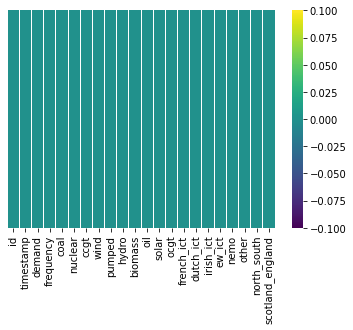

In [45]:
Check_Null_Values(CleanDataSet)

### Observations: Checking Invalid data and Null data
- Invalid Data
    - Negative values available only for those columns where electircity exported from UK to other places.
    - Other columns like demand and types of energy sources are positive and nonzero.
- Null Data
    - Data is clean and zero null values available in dataset.
    
- Hence, Data is good for further consideration.

### Exploratory Data Analysis (EDA)

In [549]:
EDADataset = DataSet.copy()

In [550]:
def Check_Type_Of_Features_Info(dataframe):
    print('\n\n-------------------------- Numerical Features Information----------------------------')
    Num_Cols = dataframe.select_dtypes(exclude=['O', 'datetime64[ns]']).columns.tolist()
    print('Numerical Columns list: {}'.format(Num_Cols))
    print('\n\nColumns info: \n{}'.format(dataframe.describe()))
    
def Visualise_Outliers(dataframe):
    
    fig = plt.figure(figsize=(10, 10))
    sns.boxplot(data=dataframe, orient="h", palette="Set2")
    
        
        
def Outlier_Range(dataframe,colname):
    print("\n\n--------------------------", colname.upper(), "----------------------------")
    DescriptiveStats = dataframe[colname].describe()
 
    IQR = DescriptiveStats['75%'] - DescriptiveStats['25%']

    upper = DescriptiveStats['75%'] + 1.5 * IQR

    lower = DescriptiveStats['25%'] - 1.5 * IQR

    print('The upper bounds for suspected outliers are {} '.format(upper))
    print("Upper bond number of rows: ",len(EDADataset[EDADataset[colname] < upper]))
    print('The lower bounds for suspected outliers are {}'.format(lower))
    print("Lower bond number of rows: ",len(EDADataset[EDADataset[colname] < lower]))

In [551]:
Check_Type_Of_Features_Info(EDADataset)



-------------------------- Numerical Features Information----------------------------
Numerical Columns list: ['id', 'demand', 'frequency', 'coal', 'nuclear', 'ccgt', 'wind', 'pumped', 'hydro', 'biomass', 'oil', 'solar', 'ocgt', 'french_ict', 'dutch_ict', 'irish_ict', 'ew_ict', 'nemo', 'other', 'north_south', 'scotland_england']


Columns info: 
                  id         demand      frequency           coal  \
count  978072.000000  978072.000000  978072.000000  978072.000000   
mean   490287.358681   32954.103625      49.955955    6919.947540   
std    282345.420762    7341.640410       1.508794    6468.466629   
min      1251.000000       0.000000       0.000000       0.000000   
25%    245769.750000   27188.000000      49.959000     772.000000   
50%    490287.500000   32283.000000      49.998001    5262.000000   
75%    734805.250000   38229.000000      50.042999   12351.000000   
max    979323.000000  254852.000000      50.403000   25300.000000   

             nuclear        

### Observation:
- Features like demand and Energy producing sources having zero non-negative values.
- Features where electricity import and export having maximum negative values.

In [552]:
#DemandEnergySources = EDADataset[['demand', 'frequency', 'coal', 'nuclear', 'ccgt', 'wind', 'pumped', 'hydro', 'biomass', 'oil', 'solar', 'ocgt']]
#ExportImportEnergy = EDADataset[['french_ict', 'dutch_ict', 'irish_ict', 'ew_ict', 'nemo', 'other', 'north_south', 'scotland_england']]


### Data preprocessing for EDA
- Daily data available with 5 min of equal interval for electricity demand as well as the energy sources use to statisfy the demands.
- Grouping whole day data into one single day data by using groupby function.

In [553]:
# keeping date in YYYY-MM-DD formate
EDADataset['timestamp'] = pd.to_datetime(EDADataset['timestamp'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')

In [554]:
EDADataset.columns

Index(['id', 'timestamp', 'demand', 'frequency', 'coal', 'nuclear', 'ccgt',
       'wind', 'pumped', 'hydro', 'biomass', 'oil', 'solar', 'ocgt',
       'french_ict', 'dutch_ict', 'irish_ict', 'ew_ict', 'nemo', 'other',
       'north_south', 'scotland_england'],
      dtype='object')

In [555]:
#EDADataset[['demand','frequency', 'coal', 'nuclear', 'ccgt', 'wind', 'pumped', 'hydro', 'biomass', 'oil', 'solar', 'ocgt', 'french_ict', 'dutch_ict', 'irish_ict', 'ew_ict', 'nemo', 'other', 'north_south', 'scotland_england']].groupby('timestamp').sum().head()

EDADataset1 = pd.DataFrame(EDADataset.groupby('timestamp').sum())


In [556]:
EDADataset1.head()

,id,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,biomass,oil,solar,ocgt,french_ict,dutch_ict,irish_ict,ew_ict,nemo,other,north_south,scotland_england
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-06-01,400078,9953046,14349.345018,2562396,2359044,4176630,456953,81519,136018,0,0,0.0,0,138716,-12994.0,-86622,0.0,0,0,0,0
2011-06-02,478800,9940044,14249.883000,2481803,2356387,4171290,197564,112403,133031,0,0,0.0,0,284520,203958.0,-109314,0.0,0,0,0,0
2011-06-03,564242,9729220,14350.387011,2353732,2457666,4200280,206157,114890,123413,0,0,0.0,0,170772,97378.0,-104030,0.0,0,0,0,0
2011-06-04,646611,8691871,14349.673021,1625879,2528021,3577682,303105,72087,104148,0,0,0.0,0,286546,194630.0,-93890,0.0,0,0,0,0
2011-06-05,728980,8574764,14351.936981,1683073,2529630,3392338,301390,83894,110162,0,0,0.0,0,286940,184924.0,-94328,0.0,0,0,0,0


In [557]:
# cross check grouping
print(len(EDADataset[EDADataset['timestamp'] == '2011-06-01']))
print(EDADataset[EDADataset['timestamp'] == '2011-06-01'].demand.sum())
print(EDADataset[EDADataset['timestamp'] == '2011-06-01'].frequency.sum())

287
9953046
14349.345018000002


In [558]:
# lets check demand time series
plt.gcf().set_size_inches(16, 16)
fig = go.Figure()
fig.add_trace(go.Scatter(x=EDADataset1.index, y=EDADataset1.demand, mode='lines', name='demand'))
fig.update_layout(showlegend=True)


<Figure size 1152x1152 with 0 Axes>

### Observation:
- There are few incidents where demand is very less.
- And those days demands we can see anomaly. 
- Need to detect going furture for forecasting else those anomlys will disrupt the forecasting.


### Ways to figure out there is anomalys
- https://towardsdatascience.com/effective-approaches-for-time-series-anomaly-detection-9485b40077f1
- By Predictive Confidence Level Approach
- Statistical Profiling Approach
- Clustering Based Unsupervised Approach

In [560]:
AnomalysEDA = pd.DataFrame(EDADataset1['demand'])
AnomalysEDA.head()

,demand
timestamp,
2011-06-01,9953046
2011-06-02,9940044
2011-06-03,9729220
2011-06-04,8691871
2011-06-05,8574764


## Attempt 1: Predictive confidence Level Approach
- Time series forecasting using any algorithm (SARIMAX, ARIMA, CNN, LSTM etc.) 
- Calculating the error metric/accuracy of the forecast is also important. 
- Error metric of our forecasting is nothing but +/- 10% error.
- This error rate should be considered as a confidence interval for the model.
- If value lie outside interval then it consider as Anomaly.

### ARIMA
- Steps we perform to implement ARIMA forecasting.
    1. Visualize the Time Series Data
    2. Make the time series data stationary
    3. Plot the Correlation and AutoCorrelation Charts
    4. Construct the ARIMA Model or Seasonal ARIMA based on the data
    5. Use the model to make predictions



### 1. Visualize the TS Data

In [561]:
# lets check demand time series
plt.gcf().set_size_inches(16, 16)
fig = go.Figure()
fig.add_trace(go.Scatter(x=AnomalysEDA.index, y=AnomalysEDA.demand, mode='lines', name='demand'))
fig.update_layout(showlegend=True)


<Figure size 1152x1152 with 0 Axes>

### Assumptions:
- Data having downward - Horizontal trend.
- Time series looks stationary, but we check by performing Dicky Fuller Test.
- Time series have seasonal.

### 2. Make time series data stationary.
- Perform Dicky Fuller test to confirm data is stationary or not.


In [562]:
## Testing For Stationarity
from statsmodels.tsa.stattools import adfuller


In [563]:
#Let's consider hypothesis 
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(dataframe):
    # Provide whole data to test
    result=adfuller(dataframe)
    # As a result of test we will get 4 different statistical values as mention below
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    # code to compare p-value and check our hypothesis
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong Evidence against the null hypothesis(Ho), REJECT the null hypothesis. Data has no unit root and is STATIONARY")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is NON-STATIONARY ")
        
        

In [564]:
adfuller_test(AnomalysEDA['demand'])

ADF Test Statistic : -3.1243264058549234
p-value : 0.02480452431147619
#Lags Used : 29
Number of Observations Used : 3374
Strong Evidence against the null hypothesis(Ho), REJECT the null hypothesis. Data has no unit root and is STATIONARY


### Observation
- As our assumption was correct.
- The p-value of data distribution is less than 0.05 hence data has no unit root and it's stationary.

### 3. Plot the Correlation and AutoCorrelation Charts
- As data is seasonal we have to perform SARIMA test i.e Seasonal ARIMA test.
- SARIMA required (p,d,q) (P,D,Q) m values
- Where, p, d, q : Non-Seasonal part of model - Auto-regressive value, Difference and Moving Average values
- P, D, Q : Seasonal part of model - Auto-regressive value, Difference and Moving Average values
- m: Seasonal parameter

#### Note: Decide seasonal parameter for daily data
- I found this is very intresting topic to perform TS on daily data.
- Intially thought to move with monthly data.
- But in real world, we have analyze daily data. So i stick with my daily data idea.
- To identify seasonal parameter i found below blogs helpful keeping here for future refrences.
    - https://stats.stackexchange.com/questions/14742/auto-arima-with-daily-data-how-to-capture-seasonality-periodicity
    - http://halweb.uc3m.es/esp/Personal/personas/amalonso/esp/TSAtema6.pdf 
    - Above 2 blogs are really helpful. Specially second one was best one slide number 4 is helpful to decide the seasonal.
    - https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/
    - https://www.researchgate.net/post/Identifying_seasonality_daily_data-method
    - https://research.fb.com/prophet-forecasting-at-scale/
    - https://online.stat.psu.edu/stat510/lesson/4/4.1
    

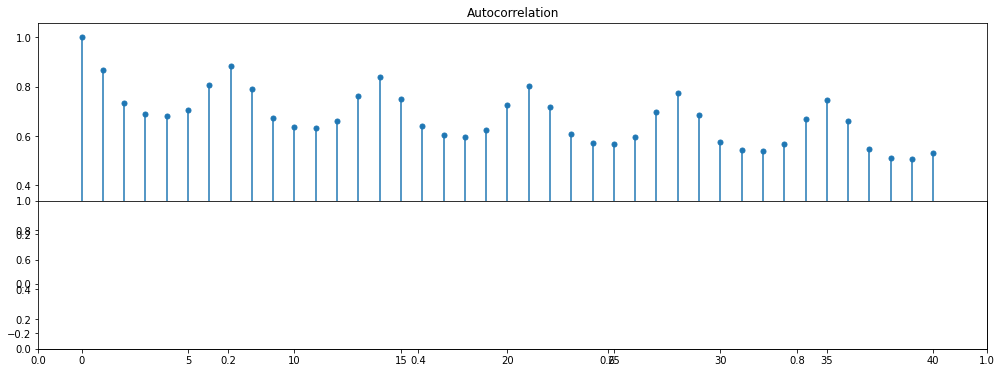

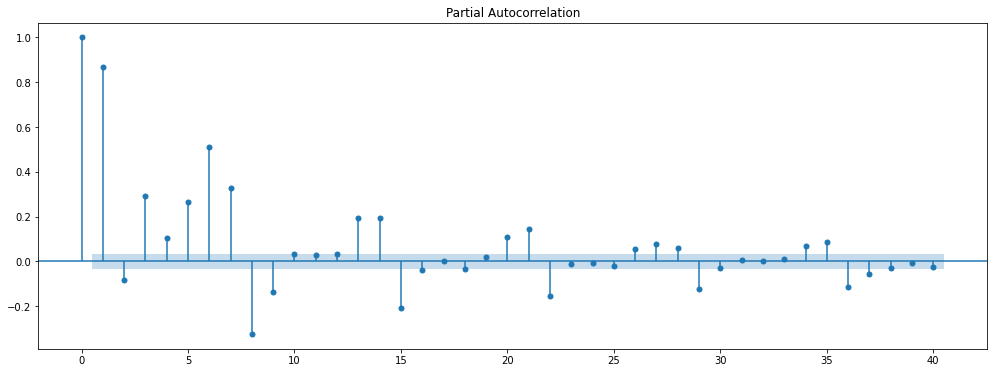

In [580]:
# Identifying p, d, q and P,D,Q values using ACF (Auto Correlation Function plot and Partial Auto Correlation function plot)
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

rcParams['figure.figsize'] = 17,6  # change figure size
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(AnomalysEDA['demand'],lags=40)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(AnomalysEDA['demand'],lags=40)

### Observation:
- The above plots helps us to identify we have to select AR-K lags or MA
- ACF plot:
    - As it have exponential decrease or lags2 have correlation with previous lag1.
    - Hence, we select AR-K lags model
- What will be the value of AR (p) and MA (q)
    - As exponential decrease is happen till lag 2.
    - Hence, p, P = 2 and q,Q=0 (As we are selecting AR model)
- Final SARIMA parameters:
    - p, P = 2
    - d, D = 0
    - q, Q = 0
    - m = 365 (as we are considering daily data)
    

In [593]:
# split data into train and test
def TSeries_train_test_split_func(TSeries, fraction_size):
    
    split_index = int(round(TSeries.shape[0]*fraction_size, 0))
    train_set = pd.DataFrame(TSeries[:split_index])
    test_set = pd.DataFrame(TSeries[split_index:])
    return train_set, test_set



In [594]:
### EXECUTE IN MAIN FUNCTION ###
train_set, test_set = TSeries_train_test_split_func(AnomalysEDA['demand'], 0.80)

In [595]:
train_set.head()

,demand
timestamp,
2011-06-01,9953046
2011-06-02,9940044
2011-06-03,9729220
2011-06-04,8691871
2011-06-05,8574764


In [596]:
test_set.head()

,demand
timestamp,
2018-11-14,9104875
2018-11-15,9785716
2018-11-16,9947082
2018-11-17,8708386
2018-11-18,8659978


In [597]:
len(train_set), len(test_set)

(2723, 681)

In [598]:
from statsmodels.tsa.arima_model import ARIMA

In [599]:
model=sm.tsa.statespace.SARIMAX(train_set['demand'],order=(2, 0, 0),seasonal_order=(2,0,0,7))
results=model.fit()

/Users/ganesh_dhasade/opt/anaconda3/envs/TimeSeriesAnalysis_UK_NG/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/ganesh_dhasade/opt/anaconda3/envs/TimeSeriesAnalysis_UK_NG/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [621]:
# Forecast
n_periods = 24
fitted, confint = results.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')


ValueError: too many values to unpack (expected 2)

In [601]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            demand   No. Observations:                 2723
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 7)   Log Likelihood              -39923.747
Date:                           Sat, 26 Sep 2020   AIC                          79857.494
Time:                                   00:13:17   BIC                          79887.042
Sample:                               06-01-2011   HQIC                         79868.175
                                    - 11-13-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6842      0.028     24.744      0.000       0.630       0.738
ar.L2          0.0567      0.033      1.718      0.086      -0.008       0.121
ar.S.L7        0.5045      0.023     22.159      0.000       0.460       0.549
ar.S.L14       0.4805      0.023     20.804      0.000       0.435       0.526
sigma2      5.722e+11   5.19e-15    1.1e+26      0.000    5.72e+11    5.72e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):              4735.02
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.50
Prob(H) (two-sided):                  0.13   Kurtosis:                         9.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.34e+41. Standard errors may be unstable.
"""

In [610]:
forecast = results.predict(test_set.shape[0])  # predict N steps into the future
mape = MAPE(test_set.demand, forecasts)

In [611]:
def MAPE(y_orig, y_pred):
    diff = y_orig - y_pred
    MAPE = np.mean((abs(y_orig - y_pred)/y_orig)  * 100.)
    return MAPE

ValueError: x and y must have same first dimension, but have shapes (1,) and (681,)

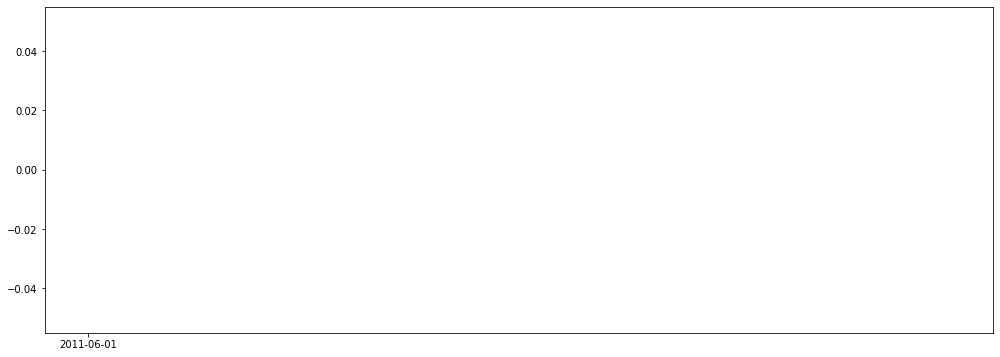

In [614]:
# upper bound and lower bound using MAPE
predicted_ub = forecast + (mape * 0.01 * forecast)
predicted_lb = forecast - (mape * 0.01 * forecast)
plt.fill_between(date, predicted_lb, predicted_ub, alpha = 0.3, color = 'red')
plt.plot(date, test_set.demand, color = 'black')
plt.legend(['Actual Test', 'Prediction Band'])
plt.xlabel('Time Period')
plt.xticks(rotation=45)
plt.ylabel('Normalized Profit')

<AxesSubplot:xlabel='timestamp', ylabel='demand'>

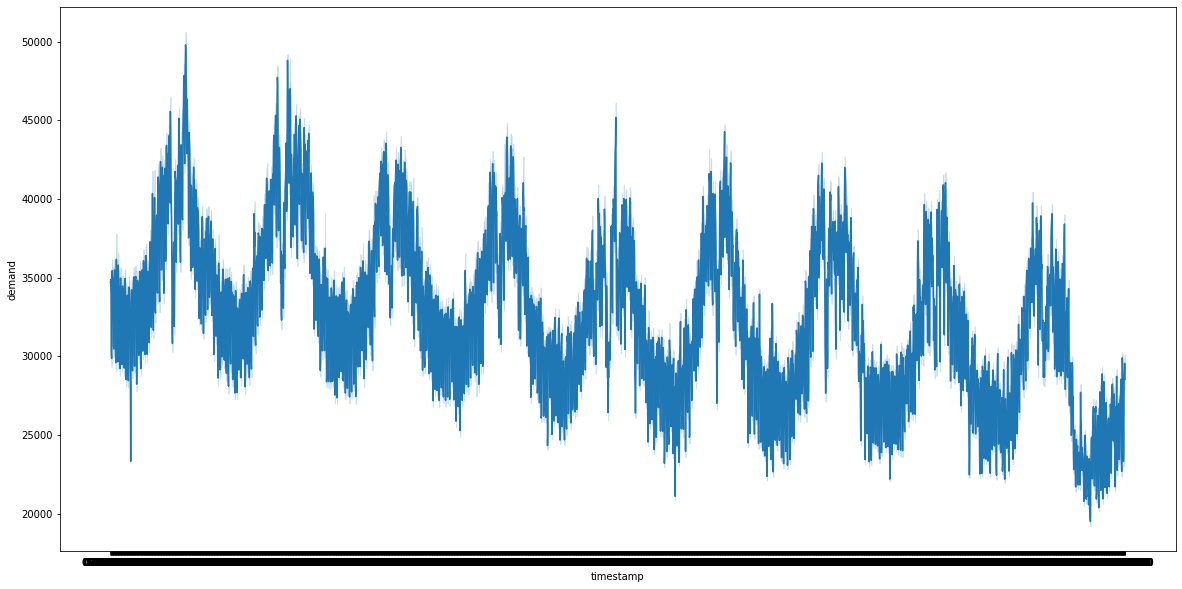

In [110]:
fig = plt.figure(figsize=(20, 10))
EDADataset['timestamp'] = pd.to_datetime(EDADataset['timestamp'], format='%d-%m-%Y').dt.strftime('%d-%m-%Y')
sns.lineplot(x='timestamp', y='demand', data=EDADataset)

<AxesSubplot:xlabel='timestamp', ylabel='demand'>

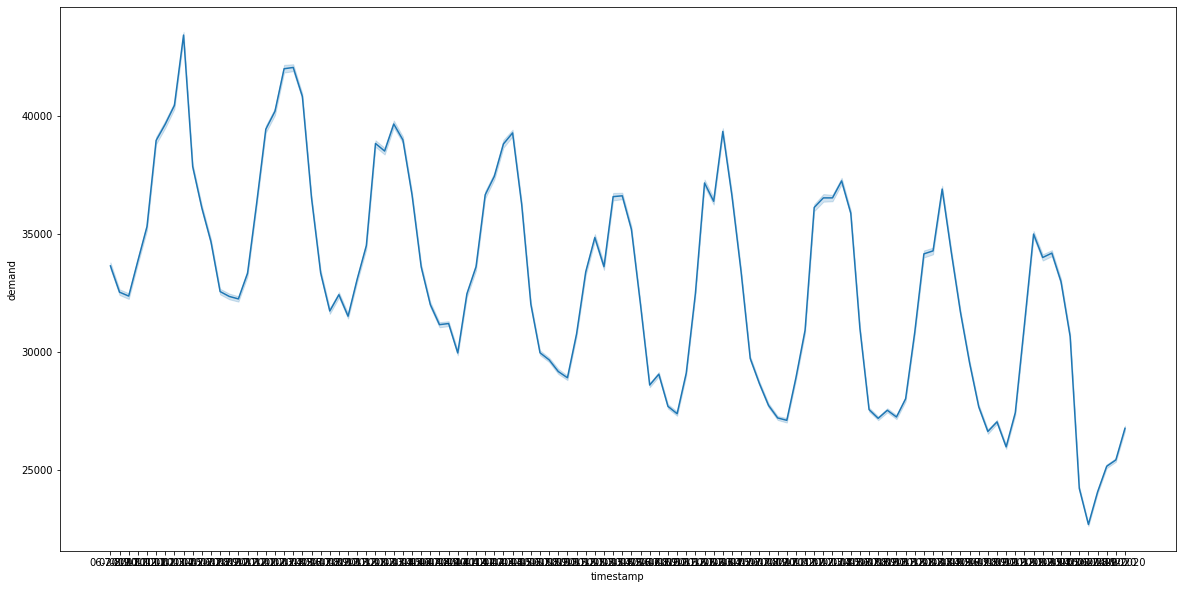

In [90]:
fig = plt.figure(figsize=(20, 10))
EDADataset['timestamp'] = pd.to_datetime(EDADataset['timestamp'], format='%m-%Y').dt.strftime('%m-%Y')
sns.lineplot(x='timestamp', y='demand', data=EDADataset)

/Users/ganesh_dhasade/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='timestamp', ylabel='demand'>

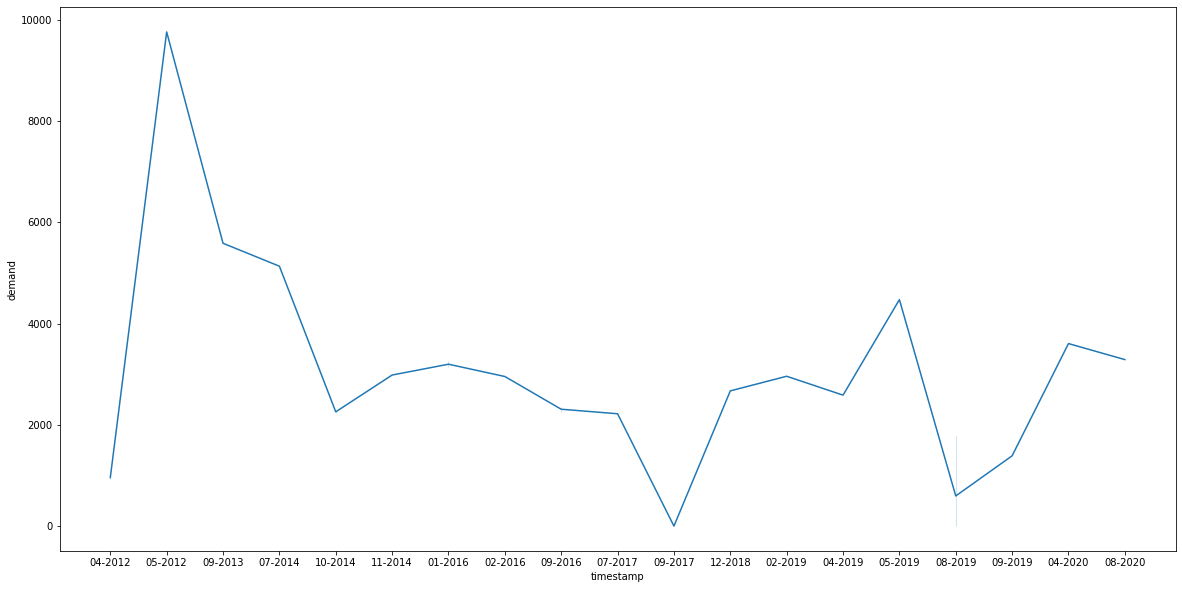

In [82]:
DemandLess = EDADataset[EDADataset.demand < 10626.5]
fig = plt.figure(figsize=(20, 10))
DemandLess['timestamp'] = pd.to_datetime(DemandLess['timestamp'], format='%m-%Y').dt.strftime('%m-%Y')
sns.lineplot(x='timestamp', y='demand', data=DemandLess)

In [122]:
EDADatasetByMonth = DataSet.copy()

In [123]:
EDADatasetByMonth['timestamp'] = pd.to_datetime(EDADatasetByMonth['timestamp'], format='%m-%Y').dt.strftime('%m-%Y')

In [124]:
EDADatasetByMonth['timestamp'].head(20)

0     06-2011
1     06-2011
2     06-2011
3     06-2011
4     06-2011
5     06-2011
6     06-2011
7     06-2011
8     06-2011
9     06-2011
10    06-2011
11    06-2011
12    06-2011
13    06-2011
14    06-2011
15    06-2011
16    06-2011
17    06-2011
18    06-2011
19    06-2011
Name: timestamp, dtype: object

<AxesSubplot:xlabel='timestamp', ylabel='demand'>

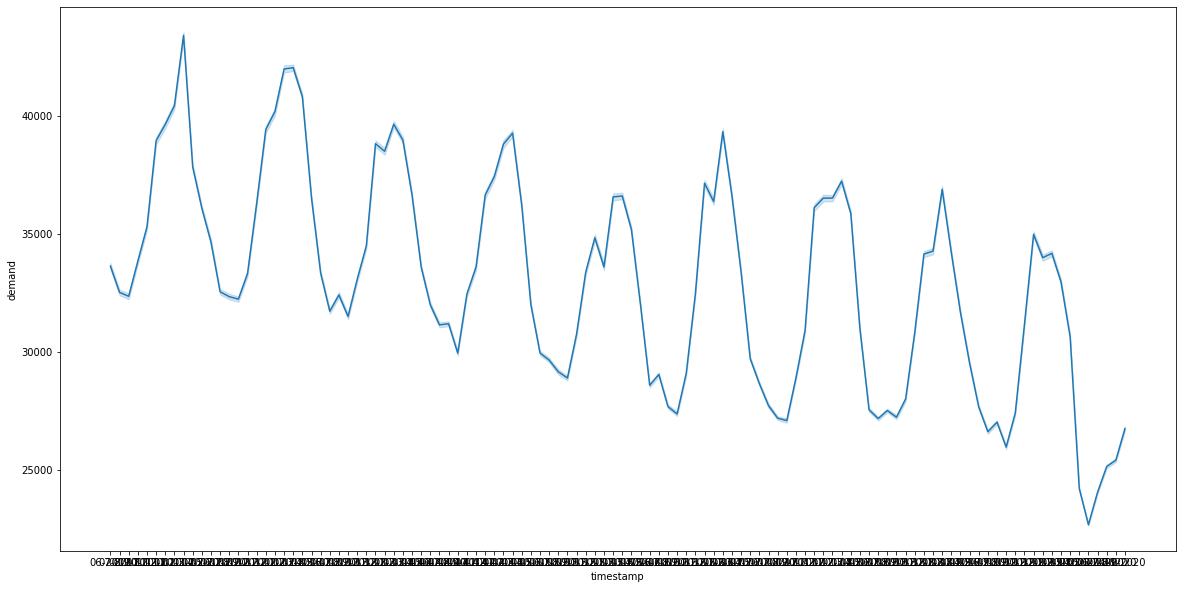

In [134]:
fig = plt.figure(figsize=(20, 10))
sns.lineplot(x='timestamp', y='demand', data=EDADatasetByMonth)

## Anamoly detections

In [422]:
AnamolyDataset = DataSet.copy()

In [423]:
AnamolyDataset = AnamolyDataset[['timestamp','demand']]

In [424]:
AnamolyDataset

,timestamp,demand
0,2011-06-01 00:00:02,28329
1,2011-06-01 00:05:12,27058
2,2011-06-01 00:10:04,27278
3,2011-06-01 00:15:03,27240
4,2011-06-01 00:20:02,27365
...,...,...
978067,2020-09-24 19:00:35,35124
978068,2020-09-24 19:05:35,35047
978069,2020-09-24 19:10:35,34910
978070,2020-09-24 19:15:35,34678


In [425]:
AnamolyDataset['timestamp'] = pd.to_datetime(AnamolyDataset['timestamp'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')

In [426]:
AnamolyDataset.head()

,timestamp,demand
0,2011-06-01,28329
1,2011-06-01,27058
2,2011-06-01,27278
3,2011-06-01,27240
4,2011-06-01,27365


In [427]:
# contain data for every 5 mins in each day
AnamolyDataset.shape

(978072, 2)

In [428]:
AnamolyDataset1=pd.DataFrame(AnamolyDataset.groupby('timestamp').demand.sum()).reset_index()

In [429]:
AnamolyDataset1.head()

,timestamp,demand
0,2011-06-01,9953046
1,2011-06-02,9940044
2,2011-06-03,9729220
3,2011-06-04,8691871
4,2011-06-05,8574764


In [430]:
AnamolyDataset1.sort_index()

,timestamp,demand
0,2011-06-01,9953046
1,2011-06-02,9940044
2,2011-06-03,9729220
3,2011-06-04,8691871
4,2011-06-05,8574764
...,...,...
3399,2020-09-20,6983203
3400,2020-09-21,8261752
3401,2020-09-22,8299817
3402,2020-09-23,8513823


In [431]:
AnamolyDataset[AnamolyDataset.timestamp == '2012-06-01'].demand.agg(['sum','count'])

sum      9781036
count        288
Name: demand, dtype: int64

In [432]:
AnamolyDataset1.shape

(3404, 2)

In [433]:
(24*60)/5

288.0

In [434]:
plt.gcf().set_size_inches(16, 16)
fig = go.Figure()
fig.add_trace(go.Scatter(x=AnamolyDataset1.timestamp, y=AnamolyDataset1.demand, mode='lines', name='demand'))
fig.update_layout(showlegend=True)
              

<Figure size 1152x1152 with 0 Axes>

## Data preprocessing
- Split data into train and test set - 80:20 ratio
- Scale data between 0 to 1 to minimize the complexity of data

In [435]:
train_size = int(len(AnamolyDataset1)*0.8)
test_size = len(AnamolyDataset1) - train_size
train,test = AnamolyDataset1.iloc[0:train_size], AnamolyDataset1.iloc[train_size:len(AnamolyDataset1)]
print(train.shape,test.shape)

(2723, 2) (681, 2)


In [436]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(train[['demand']])

train['demand'] = scaler.transform(train[['demand']])

test['demand'] = scaler.transform(test[['demand']])

In [437]:
# Creating training and test splits

def create_sequences(X,y, time_steps):
    Xs,ys = [],[]
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs),np.array(ys)

In [438]:
time_steps = 30
X_train, Y_train = create_sequences(train[['demand']],train.demand,time_steps)
X_test, Y_test = create_sequences(test[['demand']],test.demand,time_steps)

In [439]:
print(X_train.shape)
print(X_test.shape)

(2693, 30, 1)
(651, 30, 1)


In [440]:
## Build LSTM Autoencoder
# Detecting anamolys using autoencoders

#1. train data autoencoder with no anamolyes
#2. take new data point and try to reconstrut with new data points
# if new reconstruct data points above some threshold or error
# we called as anamolys

timesteps =  X_train.shape[1]
num_features = X_train.shape[2]

In [441]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [442]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

model = Sequential([
    # one lstm layer has timesteps number of neurons
    LSTM(128, input_shape = (timesteps, num_features)),
    Dropout(0.2), # we can change hyper parameter to change the values
    RepeatVector(timesteps),
    
    #mirror encoder to display as decoder
    LSTM (128, return_sequences = True),
    Dropout(0.2), # we can change hyper parameter to change the values
    TimeDistributed(Dense(num_features))
])

model.compile(loss='mae', optimizer = 'adam')
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 30, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 30, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
________________________________________________

In [443]:
# Train autoencoder

# stop early stoping helps to detect network stop improving learning and stop then and there
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 3, mode='min')

history = model.fit(
    X_train, Y_train,
    epochs = 500,
    batch_size = 32,
    validation_split = 0.1, #10 percent for validation
    callbacks = [es],
    shuffle = False # as it is time series data
    
)

Epoch 1/500
76/76 [==============================] - 5s 69ms/step - loss: 0.5032 - val_loss: 0.4243
Epoch 2/500
76/76 [==============================] - 2s 28ms/step - loss: 0.4601 - val_loss: 0.3973
Epoch 3/500
76/76 [==============================] - 2s 28ms/step - loss: 0.4442 - val_loss: 0.3657
Epoch 4/500
76/76 [==============================] - 2s 29ms/step - loss: 0.3717 - val_loss: 0.3110
Epoch 5/500
76/76 [==============================] - 3s 34ms/step - loss: 0.3144 - val_loss: 0.3057
Epoch 6/500
76/76 [==============================] - 3s 34ms/step - loss: 0.2842 - val_loss: 0.2458
Epoch 7/500
76/76 [==============================] - 2s 30ms/step - loss: 0.2775 - val_loss: 0.3460
Epoch 8/500
76/76 [==============================] - 2s 30ms/step - loss: 0.2678 - val_loss: 0.2460
Epoch 9/500
76/76 [==============================] - 2s 30ms/step - loss: 0.2711 - val_loss: 0.2652


### plot metrics and evaluate model

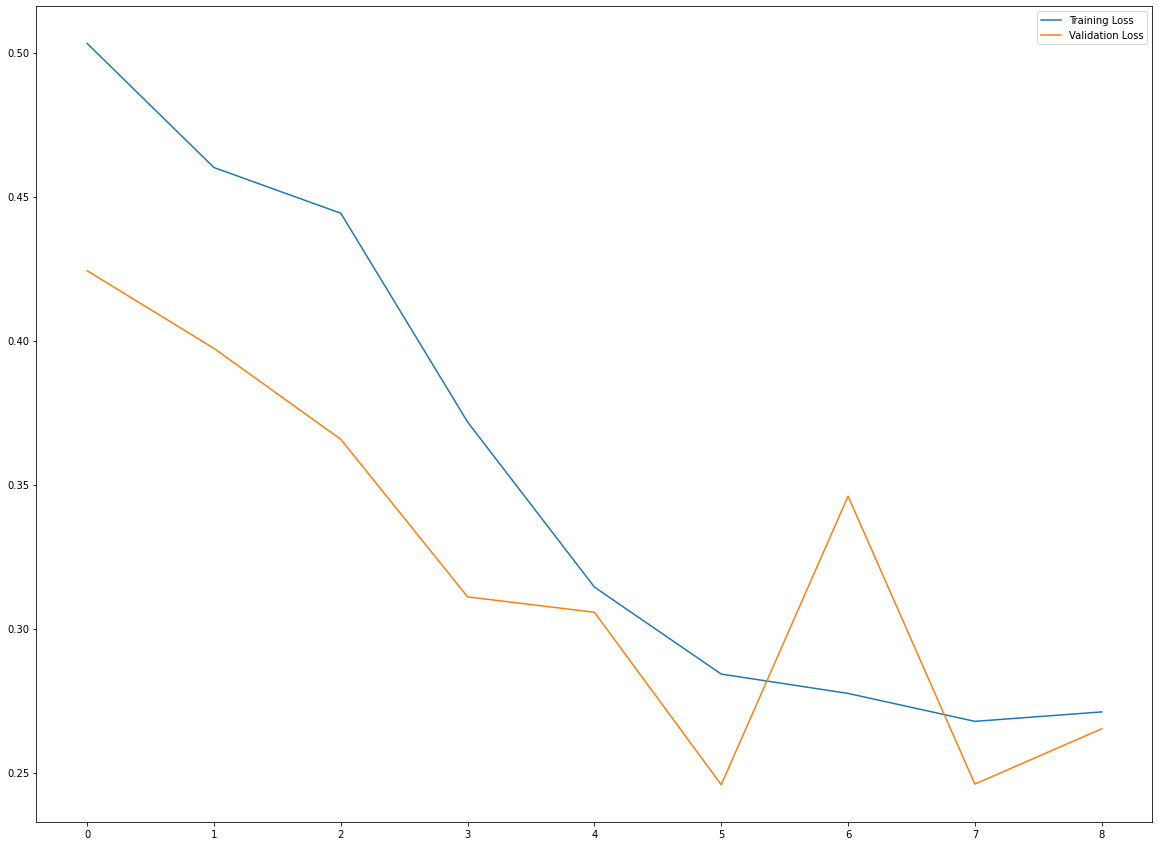

In [444]:
# plot training and validation loss
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()

In [445]:
# to detect anamoly we calculate mean absolute error

X_train_pred = model.predict(X_train)
#calculate loss for eachone of model predictions

train_mae_loss = pd.DataFrame(np.mean(np.abs(X_train_pred - X_train), axis = 1), columns=['Error'])



In [446]:
#total loss
model.evaluate(X_test, Y_test)

21/21 [==============================] - 0s 9ms/step - loss: 0.2793


0.27931511402130127

<Figure size 1440x720 with 0 Axes>

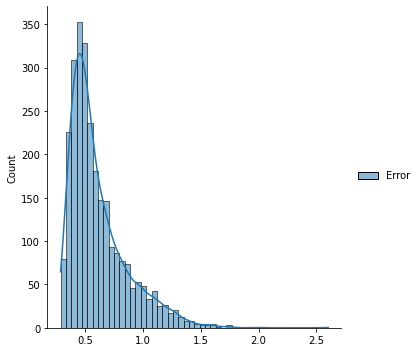

In [447]:
plt.figure(figsize=(20, 10))
sns.displot(train_mae_loss, bins=50, kde=True )

In [450]:
# help to get threshold loss i.e = 1.7
# Now we set arbitary cutoof as 1.7
# if any value exceed this thresold declare as threshold.
# value can be tweek to get better result


In [451]:
threshold = 1.7
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

### detect anamolyies

In [452]:
test_score_df = pd.DataFrame(test[time_steps:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
#bollean var to track value anamoly or not
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['demand'] = test[time_steps:].demand

In [453]:
test_score_df.head()

,timestamp,demand,loss,threshold,anomaly
2753,2018-12-14,1.113395,0.627275,1.7,False
2754,2018-12-15,0.207948,0.634671,1.7,False
2755,2018-12-16,0.145871,0.617299,1.7,False
2756,2018-12-17,0.775374,0.744331,1.7,False
2757,2018-12-18,0.461167,0.646501,1.7,False


In [454]:
test_score_df.tail()

,timestamp,demand,loss,threshold,anomaly
3399,2020-09-20,-1.927213,0.662791,1.7,False
3400,2020-09-21,-1.023209,0.403488,1.7,False
3401,2020-09-22,-0.996295,0.490191,1.7,False
3402,2020-09-23,-0.844981,0.473497,1.7,False
3403,2020-09-24,-2.162639,0.506813,1.7,False


In [455]:
#plt.gcf().set_size_inches(16, 16)
fig = go.Figure()
fig.add_trace(go.Scatter(x=test[time_steps:].timestamp, y=test_score_df.loss, mode='lines', name='Test Loss'))
fig.add_trace(go.Scatter(x=test[time_steps:].timestamp, y=test_score_df.threshold, mode='lines', name='Threshold'))
fig.update_layout(showlegend=True)
              

In [456]:
# create dataframe only for anamolies

anamolies = test_score_df[test_score_df.anomaly == True]
anamolies.head()

,timestamp,demand,loss,threshold,anomaly
3113,2019-12-09,0.367305,1.959679,1.7,True
3119,2019-12-15,-0.332983,2.011105,1.7,True


In [457]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test[time_steps:].timestamp, y=scaler.inverse_transform(test[time_steps:].demand), mode='lines', name='demand price'))

#plot line to indicate threshold
fig.add_trace(go.Scatter(x=anamolies.timestamp, y=scaler.inverse_transform(anamolies.demand), mode='markers', name='Anomaly'))
fig.update_layout(showlegend = True)
fig.show()